Questions
1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

In [13]:
#data imports
import pandas as pd
from pandas import Series, DataFrame
import pandas_datareader.data as web
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

In [5]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [8]:
end = datetime.now()
start=datetime(end.year-1, end.month, end.day)

In [14]:
for stock in tech_list:
    globals()[stock] =  web.DataReader(stock, 'yahoo', start, end)

In [15]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-15,59.412498,58.720001,59.097500,58.830002,87360000.0,58.252033
2019-10-16,58.810001,58.299999,58.342499,58.592499,73903200.0,58.016861
2019-10-17,59.037498,58.380001,58.772499,58.820000,67585200.0,58.242130
2019-10-18,59.395000,58.572498,58.647499,59.102501,97433600.0,58.521858
2019-10-21,60.247501,59.330002,59.380001,60.127499,87247200.0,59.536781
...,...,...,...,...,...,...
2020-10-08,116.400002,114.589996,116.250000,114.970001,83477200.0,114.970001
2020-10-09,117.000000,114.919998,115.279999,116.970001,100506900.0,116.970001
2020-10-12,125.180000,119.279999,120.059998,124.400002,240226800.0,124.400002


In [16]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-15,1247.329956,1220.400024,1220.400024,1243.010010,1381700,1243.010010
2019-10-16,1254.739990,1238.449951,1241.170044,1243.640015,1094600,1243.640015
2019-10-17,1263.324951,1249.939941,1250.930054,1253.069946,952400,1253.069946
2019-10-18,1258.890015,1241.079956,1253.459961,1245.489990,1352800,1245.489990
2019-10-21,1254.629028,1240.599976,1252.260010,1246.150024,1027200,1246.150024


In [17]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,84.640899,82.329447,83.455079,83.585929,1.517678e+08,83.306327
std,19.919198,19.072422,19.679214,19.480902,7.410600e+07,19.636109
min,57.125000,53.152500,57.020000,56.092499,3.247000e+07,55.840385
25%,68.824997,66.474998,67.202499,67.864998,1.018324e+08,67.400017
50%,79.599998,77.787498,78.544998,78.739998,1.354452e+08,78.270020
75%,96.297501,93.877502,94.839996,95.477501,1.830554e+08,95.305664
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,134.179993


In [18]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-15 to 2020-10-14
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


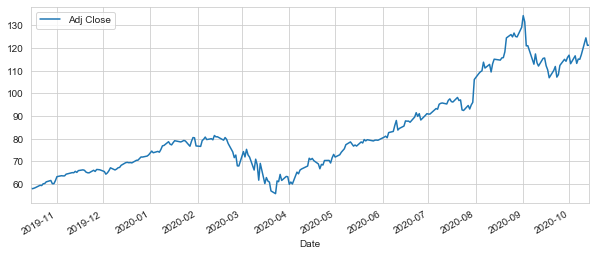

In [19]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

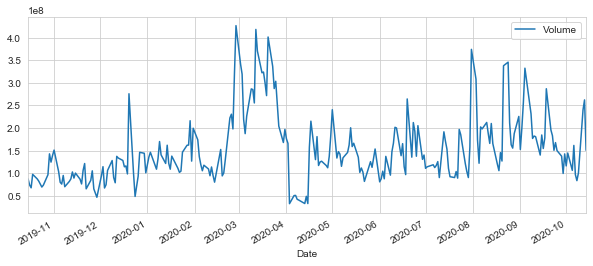

In [21]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [32]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

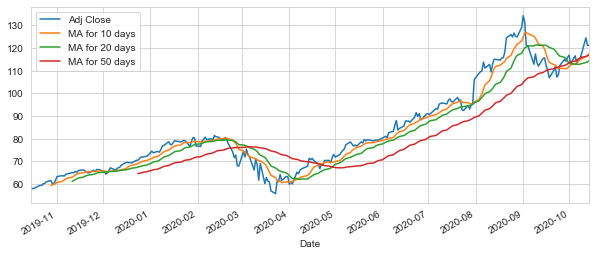

In [33]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

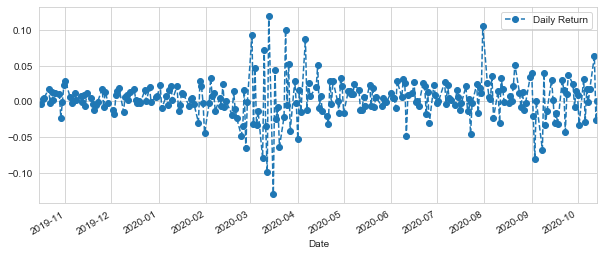

In [36]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

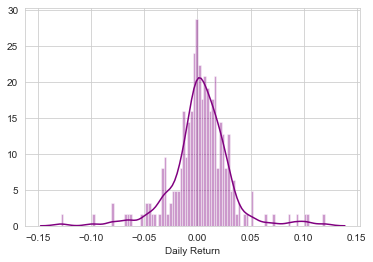

In [38]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

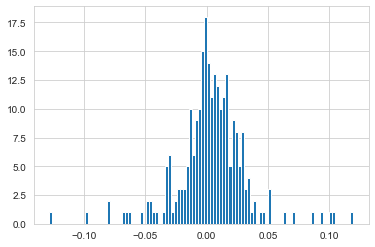

In [40]:
AAPL['Daily Return'].hist(bins=100)

In [41]:
closing_df = web.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [42]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-15,58.252033,1243.010010,139.976440,1767.380005
2019-10-16,58.016861,1243.640015,138.829483,1777.430054
2019-10-17,58.242130,1253.069946,138.117584,1787.479980
2019-10-18,58.521858,1245.489990,135.863251,1757.510010
2019-10-21,59.536781,1246.150024,136.871765,1785.660034
...,...,...,...,...
2020-10-09,116.970001,1515.219971,215.809998,3286.649902
2020-10-12,124.400002,1569.150024,221.399994,3442.929932
2020-10-13,121.099998,1571.680054,222.860001,3443.629883


In [44]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-15,NaN,NaN,NaN,NaN
2019-10-16,-0.004037,0.000507,-0.008194,0.005686
2019-10-17,0.003883,0.007583,-0.005128,0.005654
2019-10-18,0.004803,-0.006049,-0.016322,-0.016767
2019-10-21,0.017343,0.000530,0.007423,0.016017


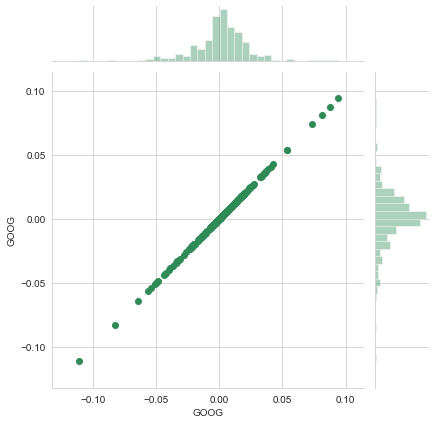

In [45]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

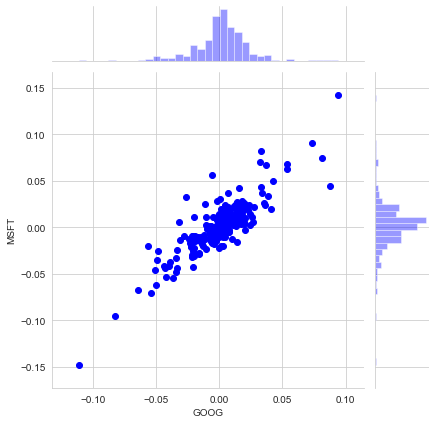

In [57]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='blue')

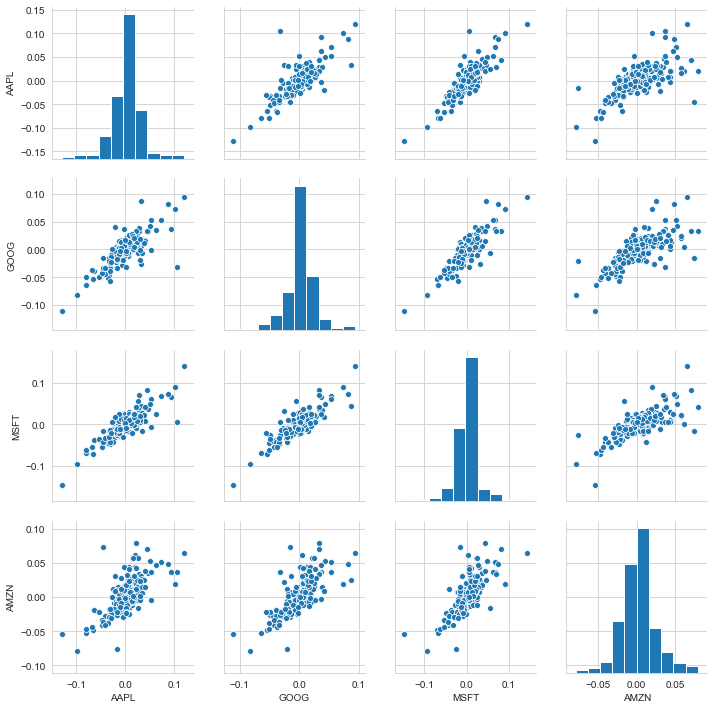

In [58]:
sns.pairplot(tech_rets.dropna())

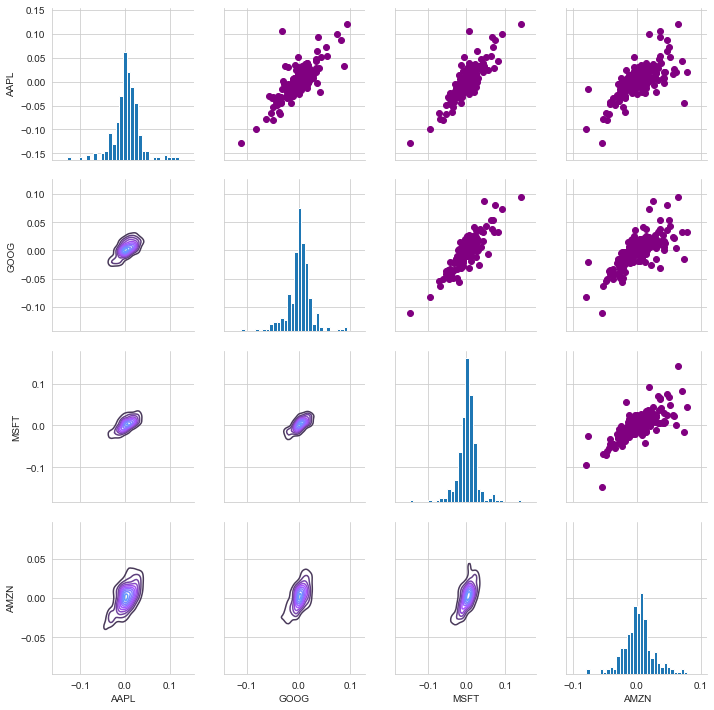

In [60]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

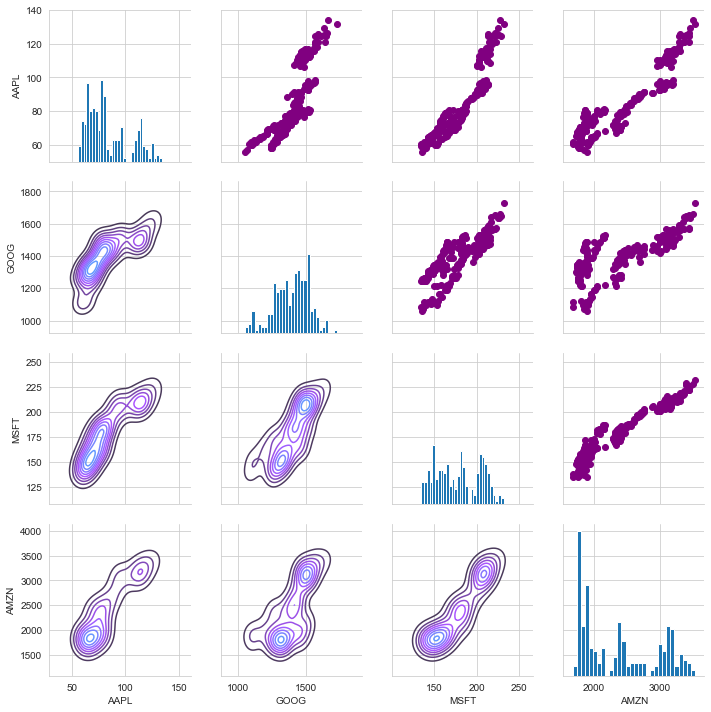

In [61]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

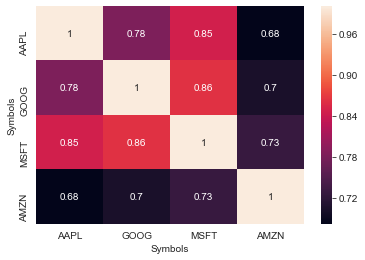

In [69]:
sns.heatmap(tech_rets.corr(),annot=True)
#fixes top and bottom
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

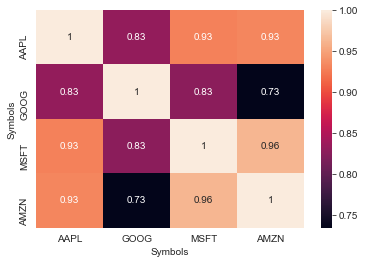

In [68]:
sns.heatmap(closing_df.corr(),annot=True)
#fixes top and bottom
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

In [70]:
rets = tech_rets.dropna()

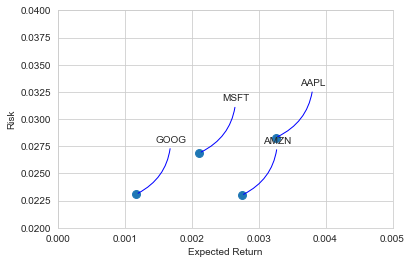

In [82]:
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s = area)

plt.ylim([0.02,0.04])
plt.xlim([0.00,0.005])

plt.xlabel('Expected Return')
plt.ylabel('Risk')
            
for label, x, y, in zip(rets.columns, rets. mean(), rets.std()):
            plt.annotate(label, xy=(x,y), xytext=(50,50), 
                         textcoords = 'offset points', ha='right', va='bottom', 
                         arrowprops = dict(arrowstyle='-', color='blue', connectionstyle='arc3, rad=-0.3'))

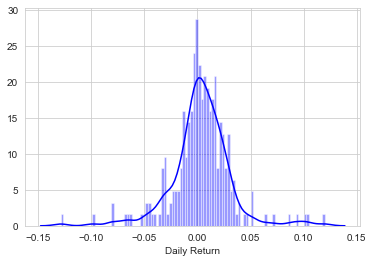

In [83]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='blue')

In [84]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-16,-0.004037,0.000507,-0.008194,0.005686
2019-10-17,0.003883,0.007583,-0.005128,0.005654
2019-10-18,0.004803,-0.006049,-0.016322,-0.016767
2019-10-21,0.017343,0.000530,0.007423,0.016017
2019-10-22,-0.002287,-0.002688,-0.014881,-0.011161


In [85]:
#value at risk
#95% confidence will only lose number below on any given day
rets['AAPL'].quantile(0.05)

-0.04161985444024205

Monte Carlo method

In [86]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [98]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

In [95]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-15,1247.329956,1220.400024,1220.400024,1243.010010,1381700,1243.010010
2019-10-16,1254.739990,1238.449951,1241.170044,1243.640015,1094600,1243.640015
2019-10-17,1263.324951,1249.939941,1250.930054,1253.069946,952400,1253.069946
2019-10-18,1258.890015,1241.079956,1253.459961,1245.489990,1352800,1245.489990
2019-10-21,1254.629028,1240.599976,1252.260010,1246.150024,1027200,1246.150024


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

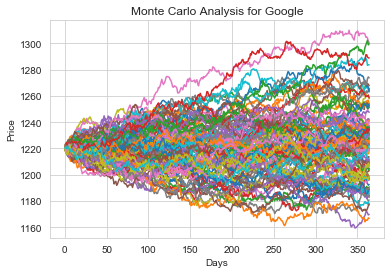

In [100]:
start_price = GOOG['Open'][0] #1220.40 - 10/15/2020

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [101]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

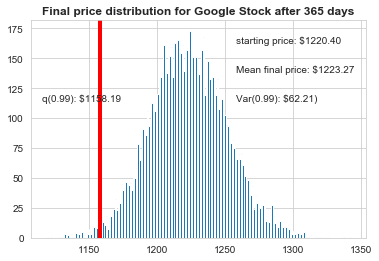

In [102]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

#Starting Price
plt.figtext(0.6, 0.8, s="starting price: $%.2f" %start_price)

#Mean Ending Price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %simulations.mean())

#Variance of the price - within 99% confidence interval
plt.figtext(0.6, 0.6, "Var(0.99): $%.2f)" %(start_price - q))

#Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

#Plot a line with 1% quantile result
plt.axvline(x=q, linewidth = 4, color='r')

#Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');